## Airplane Crashes and Fatalities Since 1908 

### By Jamil Abdulai

### Table of Contents

- Introduction
- Exploratory Data Analysis
- Conclusion


This project was inspired by the dire concern of aviation safety with the dataset acquired from Kaggle https://www.kaggle.com/datasets/thedevastator/airplane-crashes-and-fatalities. The below CRISP-DM methodology will be incorporated to analyze the data.
- Business Understanding
- Data Understanding
- Data Preparation
- Data Modeling
- Result Evaluation
- Deployment

## Business Understanding

Aircraft never crash because of one single issue. It’s almost always a combination of factors that lead to an accident. Whilst flying is extremely safe, the typical reasons as to why planes crash include pilot error, technical failures, bad weather, terrorism, and pilot fatigue.

There is never one single cause attributed to pilot an aircraft crash. For example, if the aircraft suffers a serious technical problem (but one that shouldn’t result in the loss of an aircraft) and its subsequently mishandled by the pilots resulting in a crash, does that count as pilot error or mechanical breakdown? The mechanical breakdown on it’s own shouldn’t have meant the plane crashed, but could have been handled correctly by the pilots. Therefore, both are causal factors. Some of the questions that will be analyzed are as follows:

- What type of aircraft is involved in the most crashes ?
- What is the correlation between Fatalities of Passengers to Numbr Aboard ?
- Which Locations Recorded the Most Crashes ?
- Which Operating Airlines Recorded the Most Crashes ?

## Data Understanding

This dataset showcases Boeing 707 accidents that have occurred since 1948. The data includes information on the date, time, location, operator, flight number, route, type of aircraft, registration number, cn/In number of persons on board, fatalities, ground fatalities, and a summary of the accident

## Exploratory Data Analysis

### Data Preparation

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

%matplotlib inline

In [2]:
# read the dataset and observe
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

df.head(10)

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,7/12/1912,6:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,5,3/5/1915,1:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,6,9/3/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,7,7/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,8,9/24/1916,1:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,9,10/1/1916,23:45,"Potters Bar, England",Military - German Navy,NaN,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


### Assessing the data

In [3]:
# number of rows and columns
df.shape

(5268, 14)

The dataset contains 14 columns and 5268 rows

- index: the index of the row
- Date: the date of the incident
- Time: the time of the incident
- Location: the location of the incident
- Operator: the operator of the aircraft
- Flight #: the flight number of the aircraft
- Route: the route of the aircraft
- Type: the type of aircraft
- Registration: the registration of the aircraft
- cn/In: the construction number/serial number of the aircraft
- Aboard: the number of people on board the aircraft
- Fatalities: the number of fatalities in the incident
- Ground: the number of people on the ground killed in the incident
- Summary: a summary of the incident


In [4]:
# quick overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         5268 non-null   int64  
 1   Date          5268 non-null   object 
 2   Time          3049 non-null   object 
 3   Location      5248 non-null   object 
 4   Operator      5250 non-null   object 
 5   Flight #      1069 non-null   object 
 6   Route         3562 non-null   object 
 7   Type          5241 non-null   object 
 8   Registration  4933 non-null   object 
 9   cn/In         4040 non-null   object 
 10  Aboard        5246 non-null   float64
 11  Fatalities    5256 non-null   float64
 12  Ground        5246 non-null   float64
 13  Summary       4878 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 576.3+ KB


In [5]:
df.Summary

0       During a demonstration flight, a U.S. Army fly...
1       First U.S. dirigible Akron exploded just offsh...
2       The first fatal airplane accident in Canada oc...
3       The airship flew into a thunderstorm and encou...
4       Hydrogen gas which was being vented was sucked...
                              ...                        
5263    While on approach, the military transport cras...
5264    The cargo plane crashed while on approach to I...
5265    The Airbus went missing over the AtlantiOcean ...
5266    The air ambulance crashed into hills while att...
5267    The military transport went missing while en r...
Name: Summary, Length: 5268, dtype: object

### Data cleaning

In [6]:
# observe for data duplications
df.duplicated().sum()

0

There are currently no duplicated values

In [7]:
# observe all null values
df.isnull().sum()

index              0
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [8]:
# drop null columns
df.dropna(axis = 0, inplace = True)

In [9]:
# observe the dataset again
df.shape

(944, 14)

There are currently 944 rows with 14 columns after null drops.

In [10]:
# drop unused columns
df.drop(['Flight #', 'Time', 'cn/In', 'Registration'], axis = 1, inplace = True)

The columns with flight number, Time and construction/serial numbers are dropped.

In [11]:
# observe updated dataset and confirm drop
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 208 to 5265
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       944 non-null    int64  
 1   Date        944 non-null    object 
 2   Location    944 non-null    object 
 3   Operator    944 non-null    object 
 4   Route       944 non-null    object 
 5   Type        944 non-null    object 
 6   Aboard      944 non-null    float64
 7   Fatalities  944 non-null    float64
 8   Ground      944 non-null    float64
 9   Summary     944 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 81.1+ KB


In [12]:
df.shape

(944, 10)

There are 944 rows and 10 columns.

## Explore Data Analysis and Visualize

In [13]:
# Define all the labels for the visualization
def label(x,y,t):
    """
    Args:
      x(str): label of x-axis
      y(str): label of y-axis
      t(str): label of title
    
    Returns: 
      None
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title()

### 1. What type of aircraft were involved in the most crashes ?

Text(0.5, 1.0, 'Top 5 Types of Aircrafts with Most Crashes')

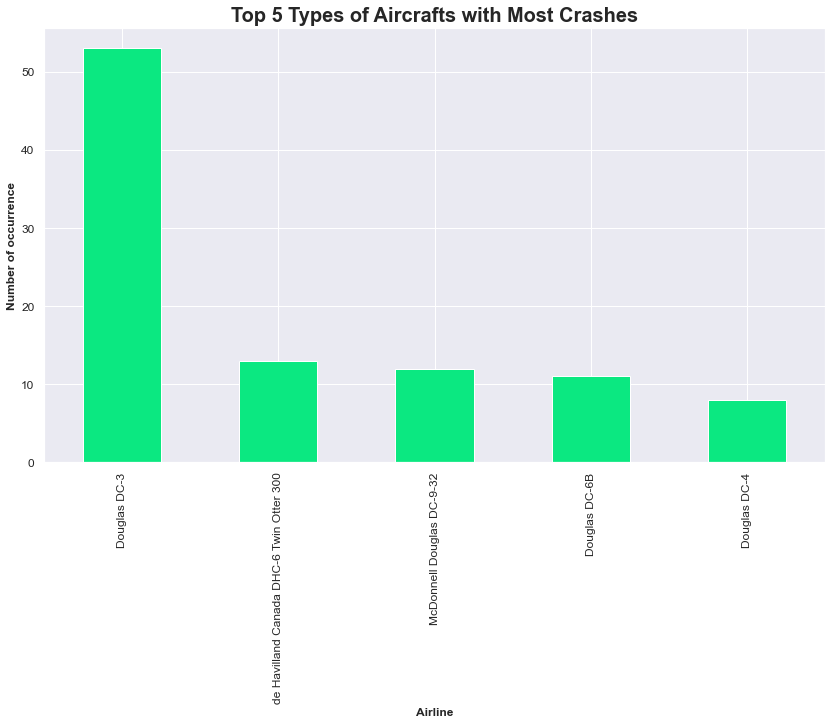

In [15]:
#A bar graph of the top 5 Types of aircrafts that Crashed 
top_aircraft_type = df.Type.value_counts()[0:5]

#Plot
aircraft_graph = top_aircraft_type.plot.bar(color = '#0be881', fontsize = 12, figsize=[14, 8])

#Add labels
plt.xlabel('Airline', fontweight = 'bold', fontsize = 12)
plt.ylabel('Number of occurrence', fontweight = 'bold', fontsize = 12)
plt.title('Top 5 Types of Aircrafts with Most Crashes', fontweight = 'bold', fontsize = 20)

From the analysis, the top 5 aircrafts with the most crashes are th Douglaa DC-3 with 54 crashes, de Havilland Canada DHC-6 Twin Other 300 with 13 crahses. McDonald Douglas DC-9-32, Douglas DC-6B and Douglas DC-4 all recorded 12,11, and 8 crashes respectively. 

### 2. What is the correlation between Fatalities of Passengers to Numbr Aboard ?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


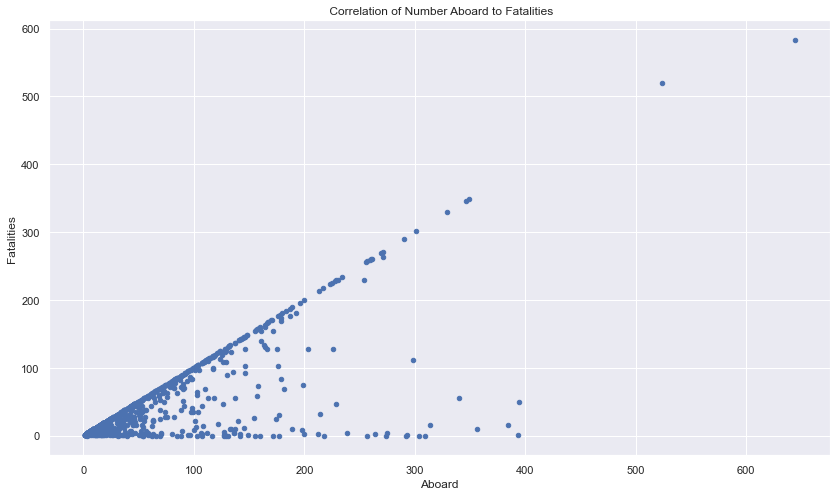

In [16]:
#The correlation of Location vs Fatalities
df.plot(x = 'Aboard', y = 'Fatalities', kind = 'scatter', title = ' Correlation of Number Aboard to Fatalities', figsize=[14, 8]);

The graph depicts the correlation between the nnumber of passenges aboard to the respective fatalities accrued which is a weak positive correlation with multiple outliers. The number of fatalities increased with number of passengers aboard.

### 3. Which Locations Recorded the Most Crashes ?

Text(0.5, 1.0, 'Top 5 Locations with Most Crashes')

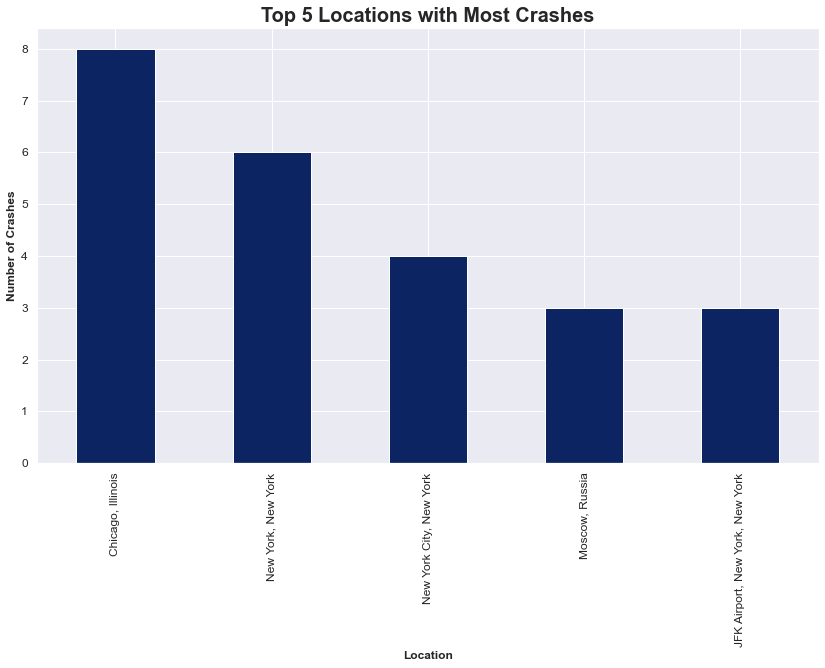

In [17]:
#A bar graph of the top 5 Locations of Airline Crashes 
airline_location = df.Location.value_counts()[0:5]

#Plot
location_graph = airline_location.plot.bar(color = '#0c2461', fontsize = 12, figsize=[14, 8])

#Add labels
plt.xlabel('Location', fontweight = 'bold', fontsize = 12)
plt.ylabel('Number of Crashes', fontweight = 'bold', fontsize = 12)
plt.title('Top 5 Locations with Most Crashes', fontweight = 'bold', fontsize = 20)

The visualization above depicts the top 5 locations with the most plane crashes are Chicago, Illinois with 8 crashes each where as New York, New York recorded 6. New York City, New York had 4 crashes with Moscow, Russia and JFK Airport, New York, New York both accumulating 3 crashes.

### 4. Which Operating Airlines Recorded the Most Crashes ?

Text(0.5, 1.0, 'Top 5 Operators with Most Crashes')

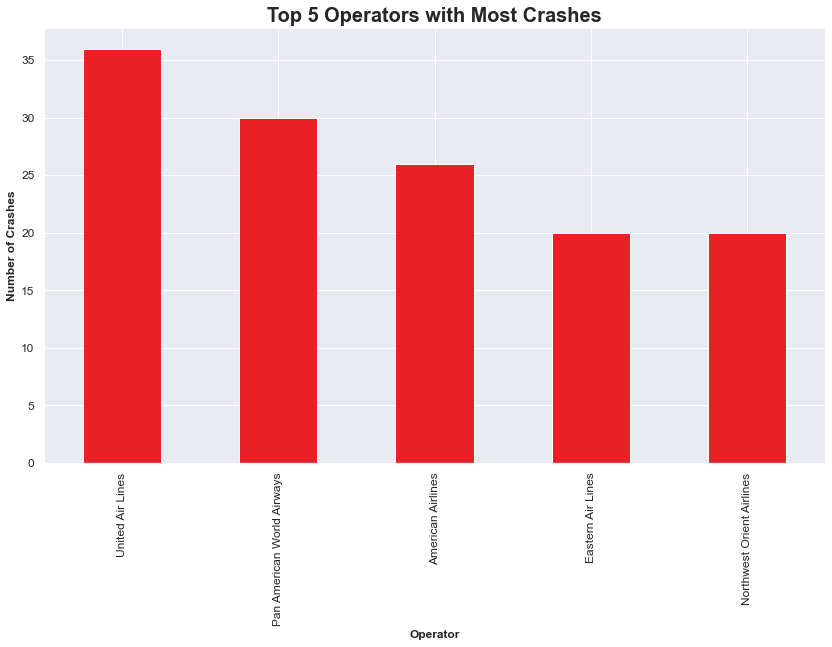

In [18]:
operator_deaths = df.Operator.value_counts()[0:5]

#Plot
operator_graph = operator_deaths.plot.bar(color = '#EA2027', fontsize = 12, figsize=[14, 8])

#Add labels
plt.xlabel('Operator', fontweight = 'bold', fontsize = 12)
plt.ylabel('Number of Crashes', fontweight = 'bold', fontsize = 12)
plt.title('Top 5 Operators with Most Crashes', fontweight = 'bold', fontsize = 20)

The above visualization shows the operating airlines with the most crashes are United Airlines with 36 crashes followed by Pan American World Airlines with 30 crashes. American Airlines had 26 crashes, with Eastern Airlines and Northwest Orient Airlines both amassing 20 crashes each.